# MAE6226 Homework 8

Li Lin

In [255]:
import math
import numpy as np
import numpy as np
np.set_printoptions(threshold=np.inf)
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import integrate

## Problem 1

In [256]:
def get_NACA_sigma(x,t,c,U_inf):
    
    if x<=0:
        sigma = 0
    else:
        sigma = 2*U_inf*5*t*c*(0.2969/(2*(x**0.5))-0.126-0.3516*2*x+0.2843*3*(x**2)-0.1015*4*(x**3))
        
    return sigma

In [257]:
N = 30
x0,xn = -0.5,1.5
y0,yn = -1.0,1.0
x = np.linspace(x0,xn,N)
y = np.linspace(y0,yn,N)
X,Y = np.meshgrid(x,y)

U_inf = 0.1
alpha = 0
u_f = U_inf * np.ones((N, N), dtype=float)*np.cos(alpha)
v_f = U_inf * np.ones((N, N), dtype=float)*np.sin(alpha)
u_sheet = np.empty ((N,N),dtype = float)
v_sheet = np.empty ((N,N),dtype = float)

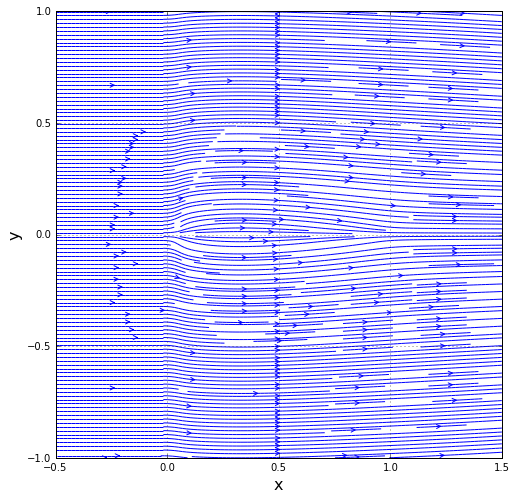

In [258]:
dx = (xn-x0)/N
t = 0.15
c = 1.0
x_min, x_max = 0.0, 1.0
for i in range(N):
    for j in range(N):  
        integrand = lambda s : ((X[i,j]-s)/((X[i,j]-s)**2+Y[i,j]**2))*get_NACA_sigma(x0+j*dx,t,c,U_inf)
        u_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]
        integrand = lambda s: ((Y[i,j])/((X[i,j]-s)**2+Y[i,j]**2))*get_NACA_sigma(x0+j*dx,t,c,U_inf)
        v_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]
u_f = U_inf * np.ones((N, N), dtype=float)*np.cos(alpha)
v_f = U_inf * np.ones((N, N), dtype=float)*np.sin(alpha)
u = u_f + u_sheet
v = v_f + v_sheet
size = 8
plt.figure(figsize=(size, (yn-y0)/(xn-x0)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x0, xn)
plt.ylim(y0,yn)
plt.streamplot(X, Y, u, v, density=4, linewidth=1, arrowsize=1, arrowstyle='->');

## Problem 2

### Question a

In [259]:
alpha = 0
M = 0.02
P = 0.4
Nc = 100
Asize = 5
dtheta = math.pi/Nc
Mtheta = math.atan(M/(c/2-P*c))
integrand1 = lambda s: 2*M/P**2*(P-(1-np.cos(s))/2)
integrand2 = lambda s: 2*M/(1-P**2)*(P-(1-np.cos(s))/2)
A0 = alpha-1/math.pi*(integrate.quad(integrand1,0,Mtheta)[0]+integrate.quad(integrand2,Mtheta,math.pi)[0])
A = np.zeros(Asize)
B = np.zeros(Asize)
for n in range (Asize-1):
    integrand3 = lambda s: 2*M/P**2*(P-(1-np.cos(s))/2)*np.cos((n+1)*s)
    integrand4 = lambda s: 2*M/(1-P**2)*(P-(1-np.cos(s))/2)*np.cos((n+1)*s)
    A[n] = 2/math.pi*(integrate.quad(integrand3,0,Mtheta)[0]+integrate.quad(integrand4,Mtheta,math.pi)[0])
for n in range (Asize-1):
    A[Asize-1-n] = A[Asize-1-n-1]
A[0] = A0
B = A
B[0] = alpha-A[0]
print (B)

[ 0.00028336  0.03383508  0.00983214  0.00951478  0.00908081]


### Question b

In [260]:
def get_A (alpha, M, P, Asize):
    
    NC = 100
    dtheta = math.pi/Nc
    Mtheta = math.atan(M/(c/2-P*c))
    integrand1 = lambda s: 2*M/P**2*(P-(1-np.cos(s))/2)
    integrand2 = lambda s: 2*M/(1-P**2)*(P-(1-np.cos(s))/2)
    A0 = alpha-1/math.pi*(integrate.quad(integrand1,0,Mtheta)[0]+integrate.quad(integrand2,Mtheta,math.pi)[0])
    A = np.zeros(Asize)
    for n in range (Asize-1):
        integrand3 = lambda s: 2*M/P**2*(P-(1-np.cos(s))/2)*np.cos((n+1)*s)
        integrand4 = lambda s: 2*M/(1-P**2)*(P-(1-np.cos(s))/2)*np.cos((n+1)*s)
        A[n] = 2/math.pi*(integrate.quad(integrand3,0,Mtheta)[0]+integrate.quad(integrand4,Mtheta,math.pi)[0])
    for n in range (Asize-1):
        A[Asize-1-n] = A[Asize-1-n-1]
    A[0] = A0
    
    return A 

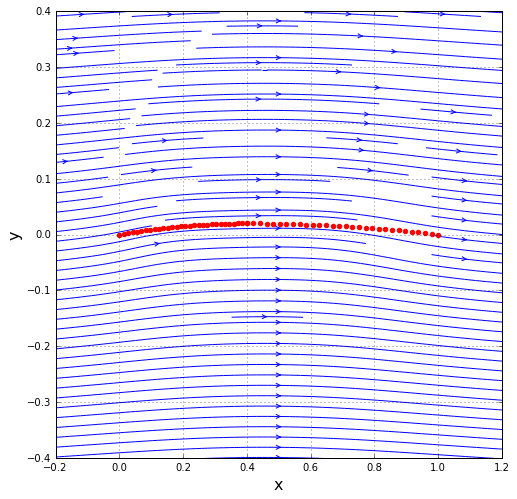

In [261]:
alpha = 0
M = 0.02
P = 0.4
c = 1.
dx = (xn-x0)/N
cN = int(1.0/dx)
A = get_A(alpha,M,P,5)
u_sheet = np.empty ((N,N),dtype = float)
v_sheet = np.empty ((N,N),dtype = float)
x_min, x_max = 0.0, c
for i in range(N):
    for j in range(N):  
        integrand = lambda s: (2*U_inf*c/2*(A[0]*(1+np.arccos(1-2*s)))+A[1]*np.sin(1*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[2]*np.sin(2*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[3]*np.sin(3*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[4]*np.sin(4*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s)))*Y[i,j]/((X[i,j]-s)**2+Y[i,j]**2) 
        u_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand,x_min,x_max)[0]
        integrand = lambda s: (2*U_inf*c/2*(A[0]*(1+np.arccos(1-2*s)))+A[1]*np.sin(1*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[2]*np.sin(2*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[3]*np.sin(3*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[4]*np.sin(4*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s)))*(X[i,j]-s)/((X[i,j]-s)**2+Y[i,j]**2) 
        v_sheet[i,j] = -1/(2*math.pi)*integrate.quad(integrand,x_min,x_max)[0]
u_f = U_inf * np.ones((N, N), dtype=float)*np.cos(alpha)
v_f = U_inf * np.ones((N, N), dtype=float)*np.sin(alpha)
u = u_f + u_sheet
v = v_f + v_sheet
size = 8
plt.figure(figsize=(size, (yn-y0)/(xn-x0)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.4, 0.4)
plt.streamplot(X, Y, u, v, density=4, linewidth=1, arrowsize=1, arrowstyle='->')
cx1 = np.linspace(0,1*P,N)
cy1 = M/(P**2)*(2*P*cx1-cx1**2)
cx2 = np.linspace(P,c,N)
cy2 = M/(1-P)**2*(1-2*P+2*P*cx2-cx2**2)
plt.scatter(cx1,cy1,color = 'r')
plt.scatter(cx2,cy2,color = 'r');

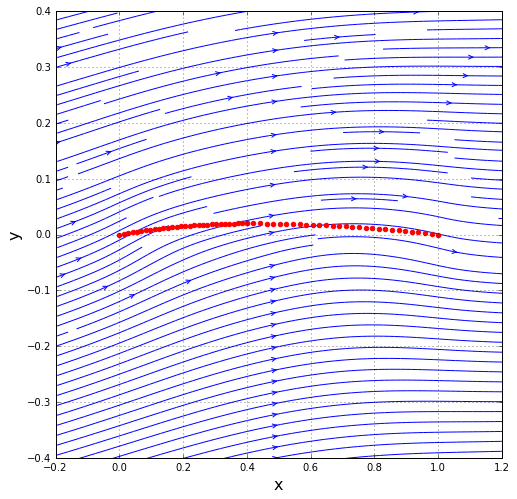

In [262]:
alpha = 5.0/180.0*math.pi
M = 0.02
P = 0.4
c = 1.
dx = (xn-x0)/N
cN = int(1.0/dx)
A = get_A(alpha,M,P,5)
cx = np.linspace(0.01,0.99,N)
u_sheet = np.empty ((N,N),dtype = float)
v_sheet = np.empty ((N,N),dtype = float)
x_min, x_max = 0.0, c
for i in range(N):
    for j in range(N):  
        integrand = lambda s: (2*U_inf*c/2*(A[0]*(1+np.arccos(1-2*s)))+A[1]*np.sin(1*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[2]*np.sin(2*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[3]*np.sin(3*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[4]*np.sin(4*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s)))*Y[i,j]/((X[i,j]-s)**2+Y[i,j]**2) 
        u_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand,x_min,x_max)[0]
        integrand = lambda s: (2*U_inf*c/2*(A[0]*(1+np.arccos(1-2*s)))+A[1]*np.sin(1*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[2]*np.sin(2*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[3]*np.sin(3*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s))\
+A[4]*np.sin(4*np.arccos(1-2*s))*np.sin(np.arccos(1-2*s)))*(X[i,j]-s)/((X[i,j]-s)**2+Y[i,j]**2) 
        v_sheet[i,j] = -1/(2*math.pi)*integrate.quad(integrand,x_min,x_max)[0]
u_f = U_inf * np.ones((N, N), dtype=float)*np.cos(alpha)
v_f = U_inf * np.ones((N, N), dtype=float)*np.sin(alpha)
u = u_f + u_sheet
v = v_f + v_sheet
size = 8
plt.figure(figsize=(size, (yn-y0)/(xn-x0)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.4, 0.4)
plt.streamplot(X, Y, u, v, density=4, linewidth=1, arrowsize=1, arrowstyle='->')
cx1 = np.linspace(0,1*P,N)
cy1 = M/(P**2)*(2*P*cx1-cx1**2)
cx2 = np.linspace(P,c,N)
cy2 = M/(1-P)**2*(1-2*P+2*P*cx2-cx2**2)
plt.scatter(cx1,cy1,color = 'r')
plt.scatter(cx2,cy2,color = 'r');

### Question c and d

In [266]:
alpha = 0
M = 0.02
P = 0.4
Nc = 100
A = get_A(alpha,M,P,5)
integrand_lift = lambda s: (A[0]*(1+np.cos(s))/np.sin(s)+A[1]*np.sin(1*s)+A[2]*np.sin(2*s)+A[3]*np.sin(3*s)\
                                   +A[4]*np.sin(4*s))*c/2*np.sin(s)
rho = 1.0
L = rho*U_inf*integrate.quad(integrand_lift,0,2*math.pi)[0]
print(L)
B = A
B[0] = alpha-A[0]
alpha_L0 = (B[0]-B[1]/2.0)/math.pi*180.0
print(alpha_L0)

0.005225781440512758
-0.953068249816


In [267]:
alpha = 5.0/180.0*math.pi
M = 0.02
P = 0.4
Nc = 100
A = get_A(alpha,M,P,5)
integrand_lift = lambda s: (A[0]*(1+np.cos(s))/np.sin(s)+A[1]*np.sin(1*s)+A[2]*np.sin(2*s)+A[3]*np.sin(3*s)\
                                   +A[4]*np.sin(4*s))*c/2*np.sin(s)
rho = 1.0
L = rho*U_inf*integrate.quad(integrand_lift,0,2*math.pi)[0]
print(L)

0.03264134922131653


In [268]:
alpha = -0.953/180.0*math.pi
M = 0.02
P = 0.4
Nc = 100
A = get_A(alpha,M,P,5)
integrand_lift = lambda s: (A[0]*(1+np.cos(s))/np.sin(s)+A[1]*np.sin(1*s)+A[2]*np.sin(2*s)+A[3]*np.sin(3*s)\
                                   +A[4]*np.sin(4*s))*c/2*np.sin(s)
rho = 1.0
L = rho*U_inf*integrate.quad(integrand_lift,0,2*math.pi)[0]
print(L)

3.742214915590022e-07


The lift for zero angle of attack (AOA) is 0.005226, the lift for 5 degrees AOA is 0.03264, and the zero lift AOA is -0.953 degrees. The lift for zero lift AOA is 3.7422e-7, which agrees the "zero lift" condition. Note that $U_\infty = 0.1$ in this simulation.